# Exploring the Data
In this notebook, I am going to take a deeper look at all of the data collected and see what I can learn from it. Currently this is not going to effect the recommender, but it may help me make some decisions should I look to build a more advanced recommender in the future. It could also be useful to anyone looking for insights into what the top 1,000 board games look like. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
users = pd.read_csv('https://storage.googleapis.com/bg_recommender_data/all_user_reviews.csv')
games = pd.read_csv('../data/games_final.csv', index_col='rank')

## Looking at the Games with the Most and Fewest Ratings

In [3]:
most_rated = users['title'].value_counts().head(10)
most_rated

Pandemic             111628
Carcassonne          111368
Catan                111010
7 Wonders             92086
Dominion              83083
Ticket to Ride        78057
Terraforming Mars     77388
Codenames             76830
7 Wonders Duel        72606
Agricola              67302
Name: title, dtype: int64

In [4]:
least_rated = users['title'].value_counts().tail(10)
least_rated

A Distant Plain                                  1609
Falling Sky: The Gallic Revolt Against Caesar    1575
Combat Commander: Pacific                        1575
No Retreat! The Russian Front                    1572
Project: ELITE                                   1480
Hannibal & Hamilcar                              1384
Shikoku 1889                                     1326
Summoner Wars (Second Edition)                   1321
Clash of Cultures: Monumental Edition            1254
Unmatched: Jurassic Park – InGen vs Raptors      1246
Name: title, dtype: int64

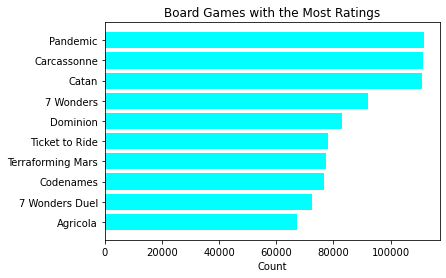

In [5]:
plt.barh(most_rated.index[::-1], most_rated.sort_values(ascending=True), color='cyan')
plt.title('Board Games with the Most Ratings')
plt.xlabel('Count');

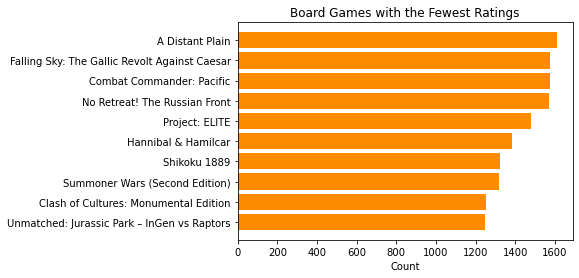

In [6]:
plt.barh(least_rated.index[::-1], least_rated.sort_values(ascending=True), color='darkorange')
plt.title('Board Games with the Fewest Ratings')
plt.xlabel('Count');

In [7]:
games[games['game_name'].isin(most_rated.index)].describe()

,game_id,game_yr_pub,min_players,max_players,min_play_time,min_age,avg_rating,complexity
count,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,10.000000
mean,69655.600000,2007.800000,1.900000,4.90000,42.000000,10.400000,7.689788,2.353070
std,74297.915364,6.795423,0.567646,1.66333,29.832868,2.319004,0.371931,0.674913
min,13.000000,1995.000000,1.000000,2.00000,15.000000,7.000000,7.128790,1.275500
25%,14544.000000,2004.750000,2.000000,4.00000,30.000000,8.500000,7.458025,1.985000
50%,33739.000000,2008.000000,2.000000,5.00000,30.000000,10.000000,7.598250,2.317900
75%,142955.250000,2013.750000,2.000000,5.00000,41.250000,12.000000,7.869895,2.392900
max,178900.000000,2016.000000,3.000000,8.00000,120.000000,14.000000,8.412640,3.639200


In [8]:
games[games['game_name'].isin(least_rated.index)].describe()

,game_id,game_yr_pub,min_players,max_players,min_play_time,min_age,avg_rating,complexity
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000
mean,181235.200000,2015.200000,1.700000,3.400000,133.000000,12.90000,8.125489,3.237380
std,115403.735024,5.977736,0.483046,1.646545,104.141997,1.66333,0.257127,0.757031
min,23540.000000,2004.000000,1.000000,2.000000,20.000000,9.00000,7.786800,1.882400
25%,83077.500000,2011.500000,1.250000,2.000000,45.000000,12.00000,7.916115,2.638700
50%,195307.000000,2017.000000,2.000000,3.000000,135.000000,14.00000,8.103370,3.444150
75%,277832.500000,2020.000000,2.000000,4.000000,180.000000,14.00000,8.310623,3.872875
max,332800.000000,2021.000000,2.000000,6.000000,360.000000,14.00000,8.593720,3.991100


Interestingly, the games with the most ratings have a lower average rating than the games with fewer ratings. This does make some sense since a game with more ratings means more people have played it and will in turn have more lower ratings bringing it down. Games with fewer ratings could be more niche and specifically sought out by people who have more interest in the game itself, leading to higher ratings.

In [9]:
# https://datagy.io/python-count-occurrences-in-list/ for some help making it condensed
cats_most = []
for row in games[games['game_name'].isin(most_rated.index)]['categories']:
    cats_most += row.split('|')
cat_most_counts = {cat:cats_most.count(cat) for cat in cats_most}

cats_least = []
for row in games[games['game_name'].isin(least_rated.index)]['categories']:
    cats_least += row.split('|')
cat_least_counts = {cat:cats_least.count(cat) for cat in cats_least}

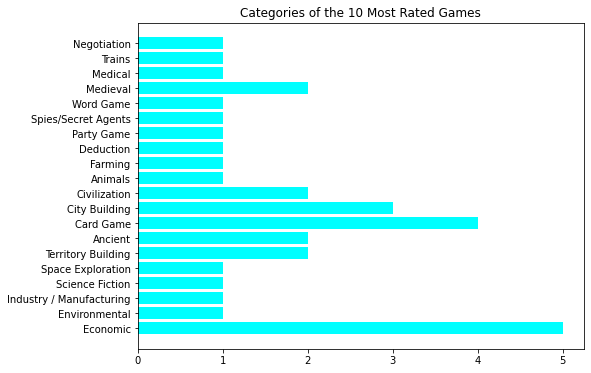

In [10]:
# https://stackoverflow.com/questions/16010869/plot-a-bar-using-matplotlib-using-a-dictionary
plt.figure(figsize=(8,6))
plt.barh(range(len(cat_most_counts)), list(cat_most_counts.values()), color='cyan')
plt.yticks(range(len(cat_most_counts)), list(cat_most_counts.keys()))
plt.title('Categories of the 10 Most Rated Games');

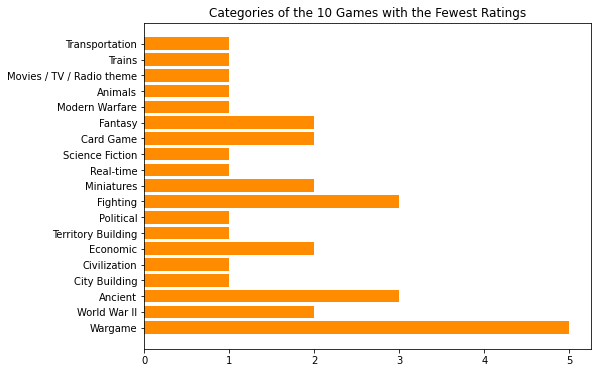

In [11]:
plt.figure(figsize=(8,6))
plt.barh(range(len(cat_least_counts)), list(cat_least_counts.values()), color='darkorange')
plt.yticks(range(len(cat_least_counts)), list(cat_least_counts.keys()))
plt.title('Categories of the 10 Games with the Fewest Ratings');

'Economic' is the most frequent category for the games with most reviews, showing up in half of them. Alternatively, 'Economic' only shows up in 2 of the games with the fewest ratings. 'Wargame' shows up in half of the fewest rated games while it doesn't show up at all in the games with the most ratings. 

In [12]:
des_most = []
for row in games[games['game_name'].isin(most_rated.index)]['designers']:
    des_most += row.split('|')
des_most_counts = {des:des_most.count(des) for des in des_most}

des_least = []
for row in games[games['game_name'].isin(least_rated.index)]['designers']:
    des_least += row.split('|')
des_least_counts = {des:des_least.count(des) for des in des_least}

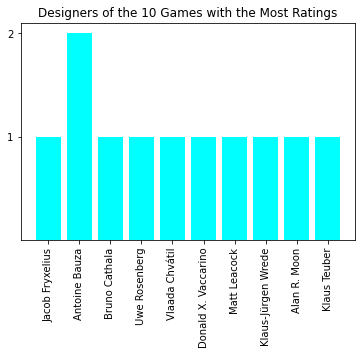

In [13]:
plt.bar(range(len(des_most_counts)), list(des_most_counts.values()),
        color='cyan')
plt.xticks(range(len(des_most_counts)), list(des_most_counts.keys()),
           rotation=90)
plt.yticks([1,2])
plt.title('Designers of the 10 Games with the Most Ratings');

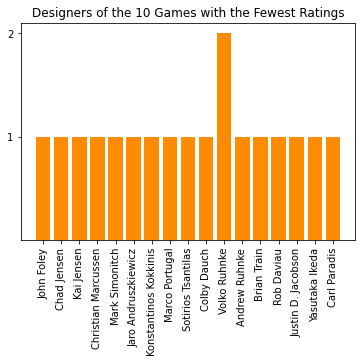

In [14]:
plt.bar(range(len(des_least_counts)), list(des_least_counts.values()), color='darkorange')
plt.xticks(range(len(des_least_counts)), list(des_least_counts.keys()), rotation=90)
plt.yticks([1,2])
plt.title('Designers of the 10 Games with the Fewest Ratings');

In [15]:
games.loc[(games['game_name'].isin(most_rated.index)),
          ['designers', 'game_name']]
#Bauza at 18 and 76

,designers,game_name
rank,,
4,Jacob Fryxelius,Terraforming Mars
18,Antoine Bauza|Bruno Cathala,7 Wonders Duel
39,Uwe Rosenberg,Agricola
76,Antoine Bauza,7 Wonders
106,Vlaada Chvátil,Codenames
108,Donald X. Vaccarino,Dominion
112,Matt Leacock,Pandemic
196,Klaus-Jürgen Wrede,Carcassonne
198,Alan R. Moon,Ticket to Ride


In [16]:
games.loc[(games['game_name'].isin(least_rated.index)),
          ['designers', 'game_name']]
# Volko at index 918 and 920

,designers,game_name
rank,,
730,John Foley|Chad Jensen|Kai Jensen,Combat Commander: Pacific
739,Christian Marcussen,Clash of Cultures: Monumental Edition
800,Mark Simonitch|Jaro Andruszkiewicz,Hannibal & Hamilcar
823,Konstantinos Kokkinis|Marco Portugal|Sotirios ...,Project: ELITE
831,Colby Dauch,Summoner Wars (Second Edition)
918,Volko Ruhnke|Andrew Ruhnke,Falling Sky: The Gallic Revolt Against Caesar
920,Volko Ruhnke|Brian Train,A Distant Plain
932,Rob Daviau|Justin D. Jacobson,Unmatched: Jurassic Park – InGen vs Raptors
944,Yasutaka Ikeda,Shikoku 1889


In [17]:
games.loc[[18, 76, 918, 920], :]

,game_id,game_name,game_yr_pub,min_players,max_players,min_play_time,min_age,avg_rating,complexity,categories,designers,publishers
rank,,,,,,,,,,,,
18,173346,7 Wonders Duel,2015,2,2,30,10,8.10685,2.2256,Ancient|Card Game|City Building|Civilization|E...,Antoine Bauza|Bruno Cathala,Repos Production|ADC Blackfire Entertainment|A...
76,68448,7 Wonders,2010,2,7,30,10,7.72534,2.3248,Ancient|Card Game|City Building|Civilization|E...,Antoine Bauza,Repos Production|ADC Blackfire Entertainment|A...
918,163154,Falling Sky: The Gallic Revolt Against Caesar,2016,1,4,180,14,7.89000,3.9911,Ancient|Wargame,Volko Ruhnke|Andrew Ruhnke,GMT Games|Fox in the Box
920,127518,A Distant Plain,2013,1,4,180,12,7.85287,3.8248,Modern Warfare|Wargame,Volko Ruhnke|Brian Train,GMT Games


[Antoine Bauza](https://boardgamegeek.com/boardgamedesigner/9714/antoine-bauza) designed [7 Wonders](https://boardgamegeek.com/boardgame/68448/7-wonders) and had a hand in designing the spinoff [7 Wonders Duel](https://boardgamegeek.com/boardgame/173346/7-wonders-duel), so similar games that both are popular. [Volko Ruhnke](https://boardgamegeek.com/boardgamedesigner/772/volko-ruhnke) on the other hand collaborated on two different games, but both are wargames and have very high weights (complexity). They both have good average ratings even if they don't have many ratings comparatively.

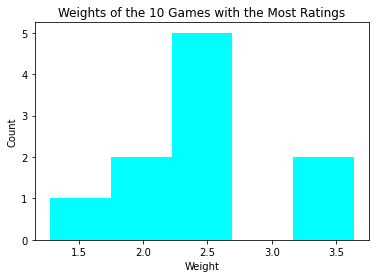

In [18]:
plt.hist(games[games['game_name'].isin(most_rated.index)]['complexity'],
         bins=5, color='cyan')
plt.title('Weights of the 10 Games with the Most Ratings')
plt.xlabel('Weight')
plt.ylabel('Count');

In [19]:
games.loc[(games['game_name'].isin(most_rated.index)),
          ['complexity', 'game_name']]

,complexity,game_name
rank,,
4,3.2478,Terraforming Mars
18,2.2256,7 Wonders Duel
39,3.6392,Agricola
76,2.3248,7 Wonders
106,1.2755,Codenames
108,2.3542,Dominion
112,2.4058,Pandemic
196,1.9048,Carcassonne
198,1.8420,Ticket to Ride


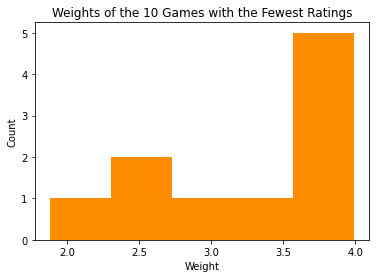

In [20]:
plt.hist(games[games['game_name'].isin(least_rated.index)]['complexity'],
         bins=5, color='darkorange')
plt.title('Weights of the 10 Games with the Fewest Ratings')
plt.xlabel('Weight')
plt.ylabel('Count');

In [21]:
games.loc[(games['game_name'].isin(least_rated.index)),
          ['complexity', 'game_name', 'categories']]

,complexity,game_name,categories
rank,,,
730,3.2256,Combat Commander: Pacific,Wargame|World War II
739,3.6627,Clash of Cultures: Monumental Edition,Ancient|City Building|Civilization|Economic|Te...
800,3.9367,Hannibal & Hamilcar,Ancient|Political|Wargame
823,2.3824,Project: ELITE,Fighting|Miniatures|Real-time|Science Fiction
831,2.4878,Summoner Wars (Second Edition),Card Game|Fantasy|Fighting
918,3.9911,Falling Sky: The Gallic Revolt Against Caesar,Ancient|Wargame
920,3.8248,A Distant Plain,Modern Warfare|Wargame
932,1.8824,Unmatched: Jurassic Park – InGen vs Raptors,Animals|Card Game|Fantasy|Fighting|Miniatures|...
944,3.8889,Shikoku 1889,Economic|Trains|Transportation


Almost all of the games with the most ratings are below a 3 in weight, the exceptions being [Terraforming Mars](https://boardgamegeek.com/boardgame/167791/terraforming-mars) and [Agricola](https://boardgamegeek.com/boardgame/31260/agricola). Coversely, 6 of the 10 games with the fewest ratings are over a 3. This makes sense since 'Wargame' games are usually very involved and have lots of mechanics that raise the weight. [Shikoku 1889](https://boardgamegeek.com/boardgame/23540/shikoku-1889) is the exception by having the third highest weight at 3.8889 but is not a war game.

# Looking at the Top 1,000 games as a Whole

In [22]:
games.describe()

,game_id,game_yr_pub,min_players,max_players,min_play_time,min_age,avg_rating,complexity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,145968.496000,2006.771000,1.841000,4.853000,61.930000,11.553000,7.506099,2.632546
std,94632.839518,135.339186,0.675407,5.535705,48.436714,2.271641,0.388824,0.795736
min,1.000000,-2200.000000,1.000000,1.000000,0.000000,0.000000,6.668800,1.020000
25%,54114.250000,2010.000000,1.000000,4.000000,30.000000,10.000000,7.203923,2.081650
50%,158355.000000,2014.000000,2.000000,4.000000,60.000000,12.000000,7.471575,2.593700
75%,221128.750000,2017.000000,2.000000,5.000000,75.000000,14.000000,7.757657,3.182175
max,343905.000000,2021.000000,6.000000,100.000000,480.000000,18.000000,8.813790,4.735900


In [23]:
categories = []
for row in games['categories']:
    categories += row.split('|')
cat_counts = {cat:categories.count(cat) for cat in categories}
    
designers = []
for row in games['designers']:
    designers += row.split('|')
des_counts = {des:designers.count(des) for des in designers}


publishers = []
for row in games['publishers']:
    publishers += row.split('|')
pub_counts = {pub:publishers.count(pub) for pub in publishers}

In [24]:
# Help from https://www.tutorialsteacher.com/articles/sort-dict-by-value-in-python
cat_counts = dict(sorted(cat_counts.items(), key=lambda x:x[1]))
cat_counts

{'Expansion for Base-game': 1,
 'Vietnam War': 1,
 'Electronic': 2,
 'Napoleonic': 2,
 'American Revolutionary War': 2,
 'American Civil War': 2,
 'Trivia': 2,
 'World War I': 3,
 'Memory': 3,
 'Mafia': 4,
 'American Indian Wars': 4,
 'Math': 4,
 'Civil War': 5,
 'Maze': 5,
 'Mature / Adult': 6,
 'Arabian': 6,
 'Pike and Shot': 6,
 'Medical': 7,
 'Modern Warfare': 7,
 'Aviation / Flight': 7,
 'Religious': 9,
 'Word Game': 9,
 'Number': 9,
 "Children's Game": 11,
 'Comic Book / Strip': 12,
 'Prehistoric': 12,
 'Educational': 13,
 'Sports': 14,
 'Age of Reason': 15,
 'American West': 15,
 'Pirates': 15,
 'Zombies': 15,
 'Video Game Theme': 16,
 'Racing': 16,
 'Travel': 17,
 'Action / Dexterity': 18,
 'Print & Play': 18,
 'Post-Napoleonic': 22,
 'Collectible Components': 22,
 'Murder/Mystery': 22,
 'Spies/Secret Agents': 23,
 'Humor': 23,
 'World War II': 24,
 'Real-time': 24,
 'Environmental': 25,
 'Trains': 25,
 'Transportation': 34,
 'Space Exploration': 37,
 'Puzzle': 37,
 'Movies / T

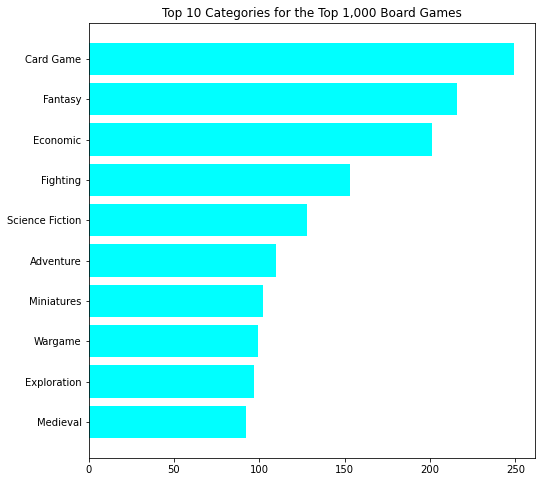

In [25]:
plt.figure(figsize=(8, 8))
plt.barh(range(10), list(cat_counts.values())[-10:], color='cyan')
plt.yticks(range(10), list(cat_counts.keys())[-10:])
plt.title('Top 10 Categories for the Top 1,000 Board Games');

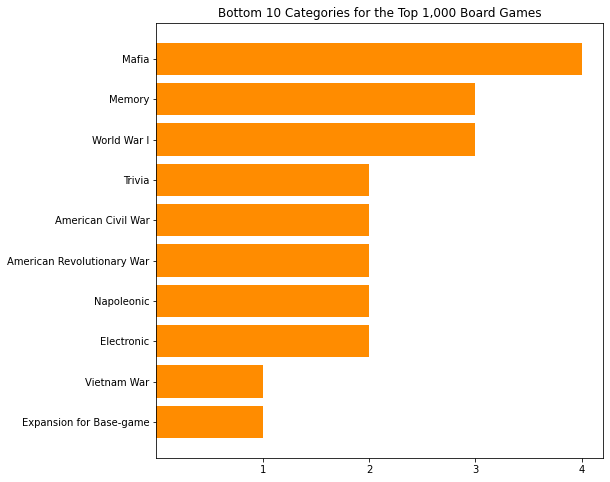

In [26]:
plt.figure(figsize=(8, 8))
plt.barh(range(10), list(cat_counts.values())[:10], color='darkorange')
plt.xticks([1,2,3,4])
plt.yticks(range(10), list(cat_counts.keys())[:10])
plt.title('Bottom 10 Categories for the Top 1,000 Board Games');

What's interesting here is that 'Wargame' is the 8th most popular category but there aren't many games with specific wars as categories. 'Cardgames' being number one is kind of surprising, but they are also typically more portable than other games and can be shared easier, making them more popular due to more exposure.

In [27]:
des_counts = dict(sorted(des_counts.items(), key=lambda x:x[1]))
des_counts

{'Dane Beltrami': 1,
 'R. Eric Reuss': 1,
 'Elizabeth Hargrave': 1,
 'MJ Newman': 1,
 'James A. Wilson': 1,
 'Andy Clautice': 1,
 'Elwen': 1,
 'Mín': 1,
 'Michael Boggs': 1,
 'Caleb Grace': 1,
 'Tommaso Battista': 1,
 'Adam Poots': 1,
 'Juma Al-JouJou': 1,
 'Jonathan Ying': 1,
 'Chris Cantrell': 1,
 'Rick Ernst': 1,
 'Stone Librande': 1,
 'Prashant Saraswat': 1,
 'Nathan Tiras': 1,
 'Mathias Wigge': 1,
 'Krzysztof Piskorski': 1,
 'Marcin Świerkot': 1,
 'Grace Holdinghaus': 1,
 'Leonhard "Lonny" Orgler': 1,
 'Thomas Dagenais-Lespérance': 1,
 'Randy Flynn': 1,
 'Christian Martinez': 1,
 'Wei-Hwa Huang': 1,
 'Ole Steiness': 1,
 'Jordy Adan': 1,
 'Jesús Torres Castro': 1,
 'Raymond Edwards': 1,
 'Samuel Bailey': 1,
 'Henry Audubon': 1,
 'Dennis K. Chan': 1,
 'Matúš Kotry': 1,
 'Andreas Steiger': 1,
 'Frédéric Guérard': 1,
 'Benoit Turpin': 1,
 'Daniel Clark (I)': 1,
 'Cody Miller': 1,
 'Dan Hallagan': 1,
 'Bill Norton': 1,
 'Brian Lewis': 1,
 'Jakub Wiśniewski': 1,
 'Adrian Adamescu': 1,
 

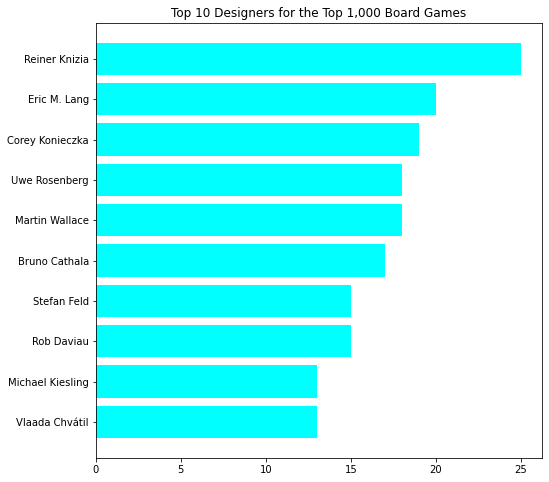

In [28]:
plt.figure(figsize=(8, 8))
plt.barh(range(10), list(des_counts.values())[-10:], color='cyan')
plt.yticks(range(10), list(des_counts.keys())[-10:])
plt.title('Top 10 Designers for the Top 1,000 Board Games');

In [29]:
pub_counts = dict(sorted(pub_counts.items(), key=lambda x:x[1]))
pub_counts

{'Ace Studios': 1,
 'Fabled Nexus': 1,
 'YingDi (旅法师营地)': 1,
 'Bluebird Games': 1,
 'BGA Plus': 1,
 'Penny Arcade': 1,
 "Game's Up": 1,
 'Fishbone Games': 1,
 'Wehrlegig Games': 1,
 'Kingdom Death': 1,
 'Karma Games': 1,
 'Riot Games': 1,
 'Serious Poulp': 1,
 'Fruhling-Honpo': 1,
 'BrownCastle Games': 1,
 'Carrom Company': 1,
 'Cogitate Games': 1,
 'Crokinole World': 1,
 'Felsberger': 1,
 'Hilinski Brothers': 1,
 'Industries Prince, Inc.': 1,
 'M. B. Ross': 1,
 'Mr. Crokinole': 1,
 "Muzzies' Country Lane Woodshop": 1,
 'Tischlerei Knels & Jeske GmbH': 1,
 'Tracey Boards': 1,
 'Willard': 1,
 'Wooden Games Crokinole': 1,
 'Wooden You Know Crokinole Boards': 1,
 'Orangutan Games': 1,
 'Czech Board Games': 1,
 'Gamesinitaly': 1,
 'Dragonfly Publishing': 1,
 'Liam Games': 1,
 'Top Licence Games': 1,
 'Ammonit Spiele': 1,
 'Editions Philibert': 1,
 'Cuaca Cerah Games': 1,
 'The Wood Games': 1,
 'Sleuth Publications': 1,
 'Ben Sanders Co.': 1,
 'Casper': 1,
 'Chessex': 1,
 'International Tea

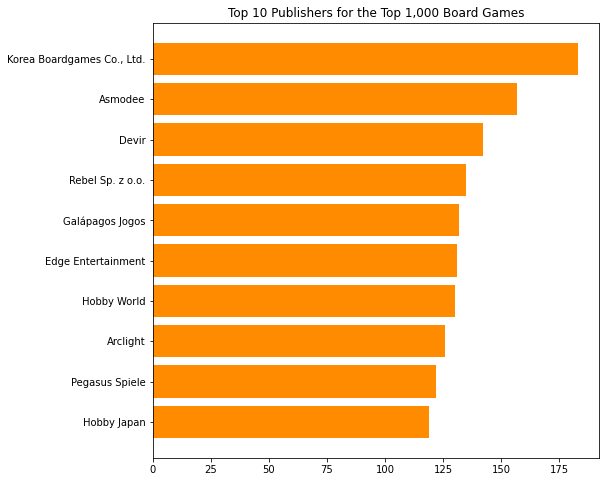

In [30]:
plt.figure(figsize=(8, 8))
plt.barh(range(10), list(pub_counts.values())[-10:], color='darkorange')
plt.yticks(range(10), list(pub_counts.keys())[-10:])
plt.title('Top 10 Publishers for the Top 1,000 Board Games');

The top publishers is not the most useful feature to use as of right now since it includes publishers from all over the world for the same game. It would be more effective if I could limit it to countries or regions, and then by game if there are multiple publishers, but I do not have a data set like that. 

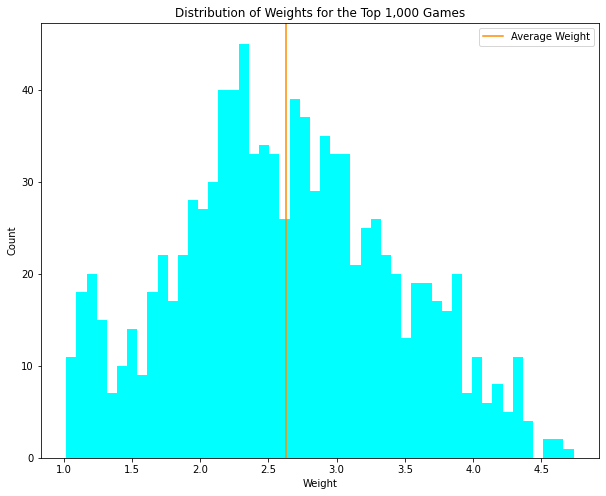

In [31]:
plt.figure(figsize=(10,8))
plt.hist(games['complexity'], bins=50, color='cyan')
plt.title('Distribution of Weights for the Top 1,000 Games')
plt.axvline(games['complexity'].mean(), color='darkorange', label='Average Weight')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.legend();

The distribution is pretty normal, with a spike around the weight of 1. This is probably kids games that are easy to learn that are in the top 1,000.

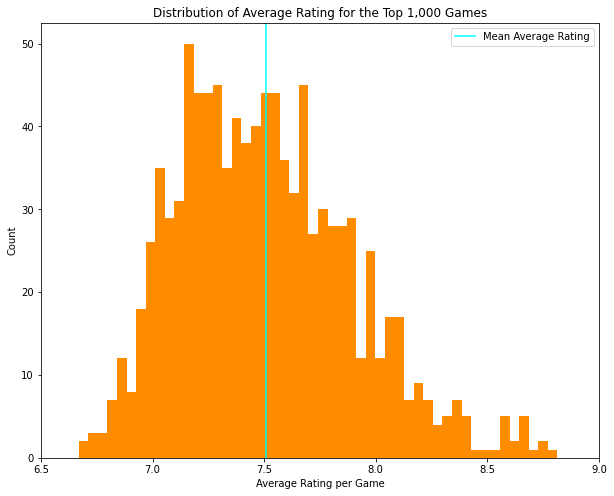

In [32]:
plt.figure(figsize=(10,8))
plt.hist(games['avg_rating'], bins=50, color='darkorange')
plt.title('Distribution of Average Rating for the Top 1,000 Games')
plt.axvline(games['avg_rating'].mean(), color='cyan', label='Mean Average Rating')
plt.xlabel('Average Rating per Game')
plt.ylabel('Count')
plt.xticks([6.5, 7, 7.5, 8, 8.5, 9])
plt.legend();

In [33]:
games['avg_rating'].mean()

7.506099039999996

There is a slight skew to the right for average rating of the games with mean average rating being just above 7.5.

# Next Steps
This notebook covered some basic EDA to show what the top 1,000 board games look liked. It was not the focus of this project so I did not go too deep, but given more time I may dive a little deeper. You can find my final thoughts in the [readme](../readme.md) for the repo.